In [1]:
import anndata
import scvelo as scv
import pandas as pd
import numpy as np
import scanpy as sc

In [2]:
adata = anndata.read_h5ad("D:/L/data/example_data/simulated/linear.h5ad")

if 'counts_spliced' in adata.layers:
    adata.layers['spliced'] = adata.layers.pop('counts_spliced')
if 'counts_unspliced' in adata.layers:
    adata.layers['unspliced'] = adata.layers.pop('counts_unspliced')
    
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)

In [8]:
adata = anndata.read_h5ad("D:/L/data/example_data/simulated/Dyngen/Bifurcating.h5ad")
sc.pp.neighbors(adata, n_neighbors = 30,n_pcs = 20)

In [14]:
adata = anndata.read_h5ad("D:/L/data/example_data/simulated/Dyngen/Trifurcating.h5ad")
sc.pp.neighbors(adata, n_neighbors = 30,n_pcs = 20)

In [ ]:
adata = anndata.read_h5ad("D:/L/data/example_data/simulated/trifurcating.h5ad")

if 'counts_spliced' in adata.layers: 
    adata.layers['spliced'] = adata.layers.pop('counts_spliced') 
if 'counts_unspliced' in adata.layers: 
    adata.layers['unspliced'] = adata.layers.pop('counts_unspliced')

sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors =30,n_pcs = 20)
sc.tl.umap(adata) 

In [20]:
adata = anndata.read_h5ad("C:/Users/user/Desktop/TRY/CellPath-master/example_data/simulated/cycletree.h5ad")

In [ ]:
adata = anndata.read_h5ad("D:/L/data/example_data/real/mouse pancreatic endocrine/pe_clust.h5ad")

In [2]:
adata = anndata.read_h5ad("D:/L/data/example_data/real/human forebrain/fb_clust.h5ad")
sc.tl.umap(adata)

In [2]:
adata = anndata.read_h5ad("D:/L/data/example_data/real/Mouse hematopoiesis/adata_day4_scvelo.h5ad")
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=100)
scv.tl.velocity(adata)

#20,0.3,5,0.7

Filtered out 2071 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:03) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [ ]:
adata = anndata.read_h5ad("D:/L/data/example_data/real/cellcycle/cell_cycle.h5ad")
scv.pp.filter_and_normalize(adata, min_shared_counts=30, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=20)
#sc.tl.umap(adata)
genes_of_interest = ['CDK1', 'CCNA2']
G1_cells = adata[adata.obs['cell_cycle_phase'] == 'G1']
mean_expression = G1_cells[:, genes_of_interest].to_df().mean(axis=1)
threshold = 1.5
G1_cells.obs['G1_chk'] = np.where(mean_expression < threshold, 'G1_chk', 'Other')
G1_chk = G1_cells[G1_cells.obs['G1_chk'] == 'G1_chk']
adata.obs['cell_cycle_phase'] = adata.obs['cell_cycle_phase'].astype(str)
idx_G1_chk = G1_chk.obs_names
adata.obs.loc[idx_G1_chk, 'cell_cycle_phase'] = 'G1_chk'
adata.obs.rename(columns = {'cell_cycle_phase':'clusters'},inplace = True)

In [3]:
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)

computing velocities


C:\jupter\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


    finished (0:00:03) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/4 cores)


  0%|          | 0/6555 [00:00<?, ?cells/s]

    finished (0:04:24) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


C:\jupter\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


recovering dynamics (using 1/4 cores)


  0%|          | 0/558 [00:00<?, ?gene/s]

    finished (0:45:49) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing terminal states
    identified 1 region of root cells and 1 region of end points .
    finished (0:00:02) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:42) --> added 
    'latent_time', shared time (adata.obs)


C:\jupter\lib\site-packages\scvelo\plotting\utils.py:869: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cb.draw_all()


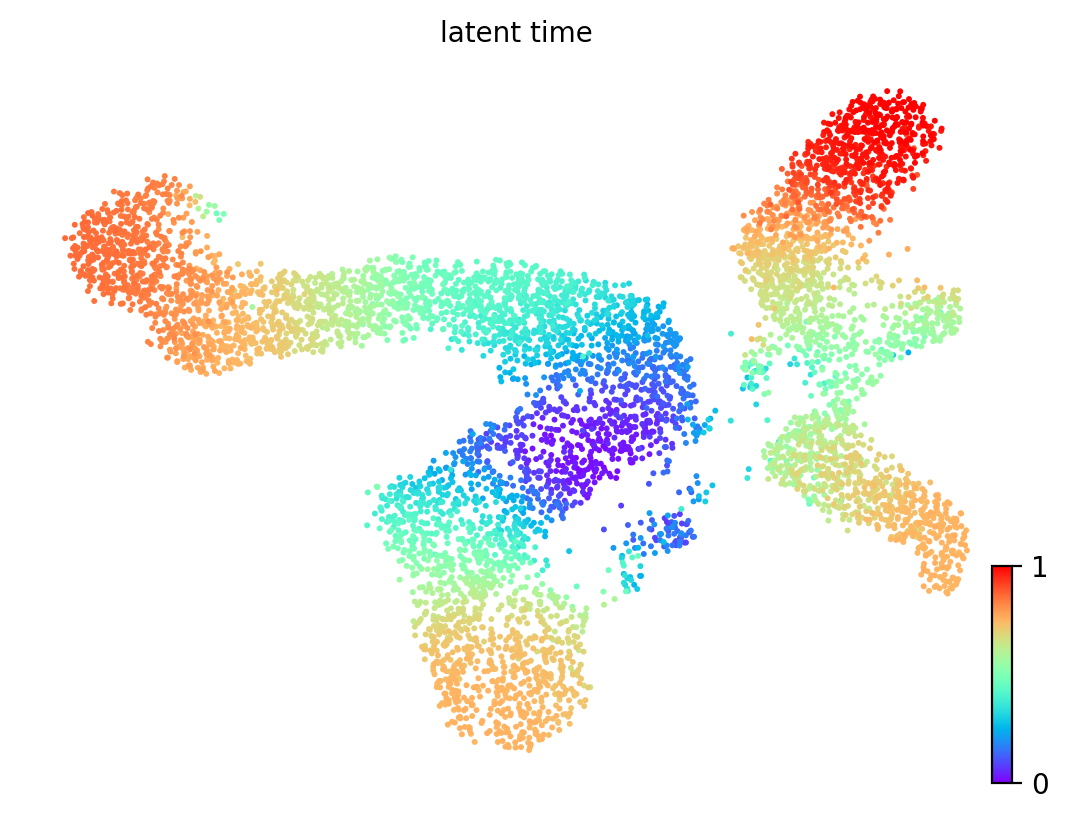

In [5]:
scv.tl.recover_dynamics(adata)
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', cmap='rainbow',dpi = 200)

In [5]:
def kendalltau(pt_pred, pt_true):
    """\
    Description
        kendall tau correlationship
    
    Parameters
    ----------
    pt_pred
        inferred pseudo-time
    pt_true
        ground truth pseudo-time
    Returns
    -------
    tau
        returned score
    """
    from scipy.stats import kendalltau
    pt_true = pt_true.squeeze()
    pt_pred = pt_pred.squeeze()
    tau, p_val = kendalltau(pt_pred, pt_true)
    return tau

from scipy.stats import spearmanr
import numpy as np

def spearmanr_corr(pt_pred, pt_true):
    """\
    Description
        Spearman's rank correlation coefficient
    
    Parameters
    ----------
    pt_pred
        inferred pseudo-time
    pt_true
        ground truth pseudo-time
    Returns
    -------
    rho
        Spearman correlation coefficient
    """
    pt_true = pt_true.squeeze()
    pt_pred = pt_pred.squeeze()
    rho, p_val = spearmanr(pt_pred, pt_true)
    return rho

In [24]:
kt = kendalltau(adata._obs.velocity_pseudotime,adata._obs.sim_time)
kt

0.6916166152795954

In [25]:
sm = spearmanr_corr(adata._obs.velocity_pseudotime,adata._obs.sim_time)
sm

0.8719988180029096